### Introduction Code ###

Code primarily used to demonstrate different colour encodings, and image save formats. Images are of my 4 dogs, Monty, Beanie, Balhu, and Arlo. 

(No dogs were harmed in the making of this project!)

In [2]:
# import packages
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

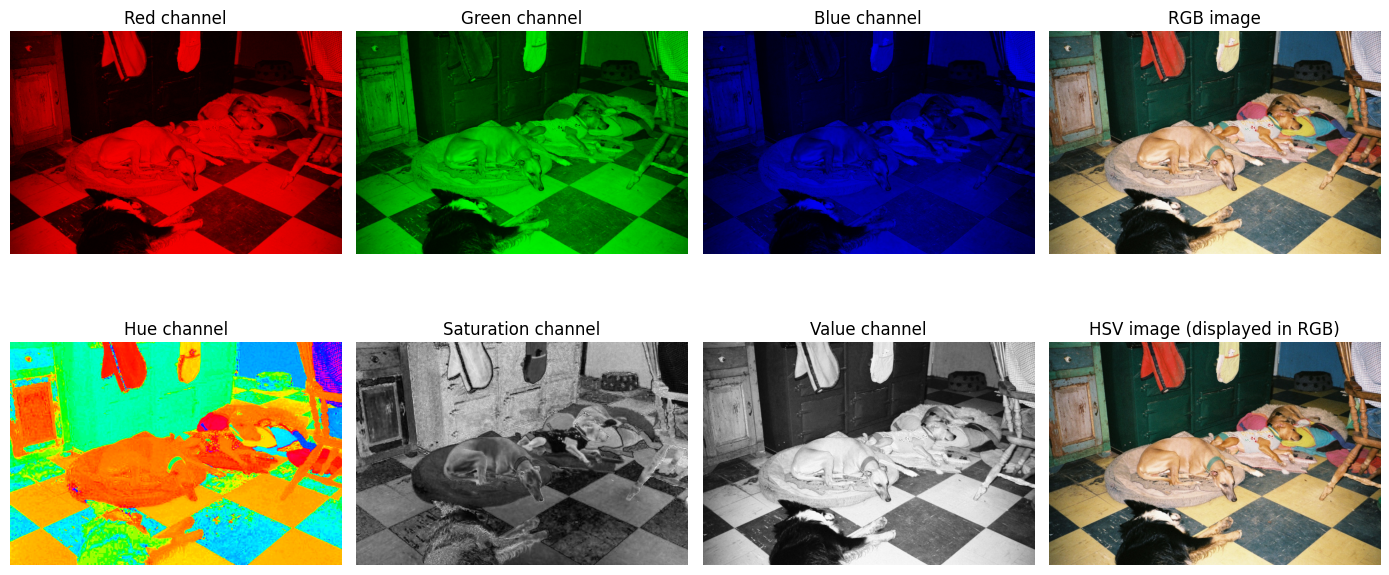

In [3]:
# load image (BGR -> RGB)
image_path = "dogs.jpeg"
bgr = cv2.imread(image_path)
rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)

# convert to HSV
hsv = cv2.cvtColor(rgb, cv2.COLOR_RGB2HSV)

# split channels
r, g, b = cv2.split(rgb)
h, s, v = cv2.split(hsv)

# create colour-specific RGB channels

red_img = np.zeros_like(rgb)
green_img = np.zeros_like(rgb)
blue_img = np.zeros_like(rgb)

red_img[:, :, 0] = r
green_img[:, :, 1] = g
blue_img[:, :, 2] = b

# plot side-by-side for comparison.
fig, axes = plt.subplots(2, 4, figsize=(14, 7))

# RGB row
axes[0, 0].imshow(red_img)
axes[0, 0].set_title("Red channel")

axes[0, 1].imshow(green_img)
axes[0, 1].set_title("Green channel")

axes[0, 2].imshow(blue_img)
axes[0, 2].set_title("Blue channel")

axes[0, 3].imshow(rgb)
axes[0, 3].set_title("RGB image")

# HSV row
axes[1, 0].imshow(h, cmap="hsv")
axes[1, 0].set_title("Hue channel")

axes[1, 1].imshow(s, cmap="gray")
axes[1, 1].set_title("Saturation channel")

axes[1, 2].imshow(v, cmap="gray")
axes[1, 2].set_title("Value channel")

axes[1, 3].imshow(rgb)
axes[1, 3].set_title("HSV image (displayed in RGB)")

# formatting
for ax in axes.flatten():
    ax.axis("off")

plt.tight_layout()
plt.show()

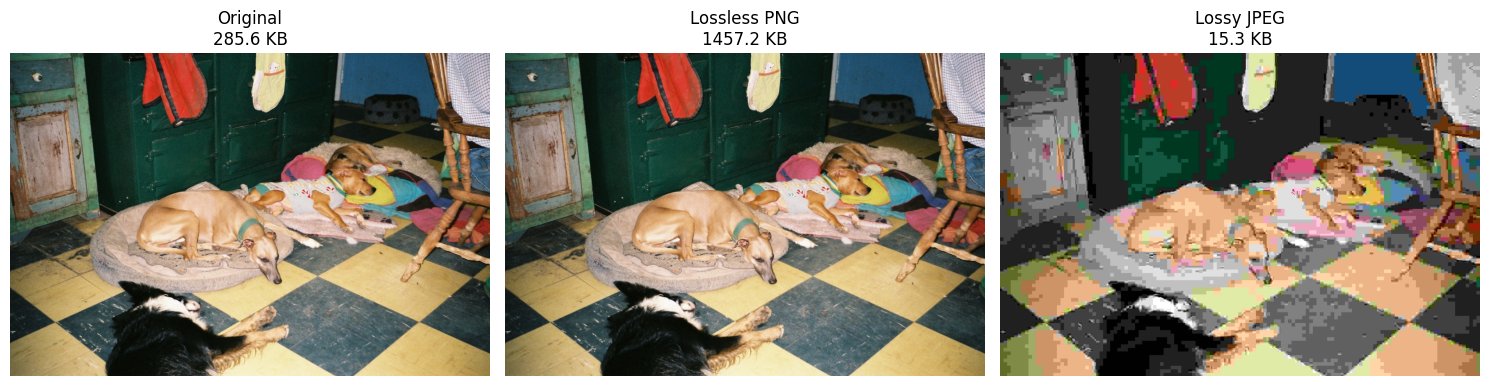

In [6]:
# save lossy vs lossless images
lossless_path = "dogs_lossless.png"
lossy_path = "dogs_lossy.jpg"

# lossless PNG
cv2.imwrite(lossless_path, bgr)

# extremely lossy JPEG (very low quality)
cv2.imwrite(lossy_path, bgr, [cv2.IMWRITE_JPEG_QUALITY, 1])

# reload images
lossless_rgb = cv2.cvtColor(cv2.imread(lossless_path), cv2.COLOR_BGR2RGB)
lossy_rgb = cv2.cvtColor(cv2.imread(lossy_path), cv2.COLOR_BGR2RGB)

# file sizes (for annotation)
orig_size = os.path.getsize(image_path) / 1024
lossless_size = os.path.getsize(lossless_path) / 1024
lossy_size = os.path.getsize(lossy_path) / 1024

# plot comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(rgb)
axes[0].set_title(f"Original\n{orig_size:.1f} KB")

axes[1].imshow(lossless_rgb)
axes[1].set_title(f"Lossless PNG\n{lossless_size:.1f} KB")

axes[2].imshow(lossy_rgb)
axes[2].set_title(f"Lossy JPEG\n{lossy_size:.1f} KB")

for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()